<a href="https://colab.research.google.com/github/nbchan/INMR96-Digital-Health-and-Data-Analytics/blob/main/Week_4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Pandas and Why Pandas?

* the go-to Python package/library for column-oriented data analysis
* great tool for handling and analyzing tabular data
* many machine learning frameworks support pandas data structures as inputs


For a complete reference to pandas functions, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

# Basic Concepts

Similar to how you would import packages in [R](https://www.r-project.org/about.html) using `library()`, the following line imports the *pandas* library to your current notebook. This line is usually put in the beginning of your code.

Note that the `as` keyword is used to create an alias for the package.

In [2]:
import pandas as pd

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation, similar to R.

![pandas-data-structure](https://raw.githubusercontent.com/niuguy/digithealthcourse/master/pics/pandas-data-structure.png)


One way to create a `Series` is to construct a `Series` object. For example:

In [3]:
pd.Series(['Reading', 'Wokingham', 'Southampton'])

0        Reading
1      Wokingham
2    Southampton
dtype: object

`DataFrame` objects can be created by passing a Python dictionary that maps column names to their respective `Series`. 

Example:

In [4]:
district_names = pd.Series(['Reading', 'Wokingham', 'Southampton'])
population = pd.Series([161780, 171119 , 252520])

df_district = pd.DataFrame({'City name': district_names, 'Population': population})

In [5]:
df_district

,City name,Population
0,Reading,161780
1,Wokingham,171119
2,Southampton,252520


To retrieve a column (as a `Series`) from a `DataFrame`, use square brackets:

In [6]:
df_district['Population']

0    161780
1    171119
2    252520
Name: Population, dtype: int64

# Importing MIMIC-III data from BigQuery as a Pandas `DataFrame` 

Most of the time, instead of creating `DataFrame`'s from scratch in Python, you load an entire file into a DataFrame. In our case, we would import MIMIC-III data via BigQuery. There are a few steps.

## 1. Provide your credentials to the Colab runtime

Run the following code. You will be given a link that requests permission of the notebook to access your data from BigQuery. Enter that link and accept the request. You might be asked to enter your password in this step. 

After that, you will be given a one-time authentication token. Copy and paste it to the textbox under the link. If successful, the message "Authenticated" would be printed. 



In [7]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


**Troubleshooting**

If you are unable to authenticate yourself, check for the following: 

* Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one. 
  * Almost all of your interactions with Google Cloud Platform are associated with a project. Importantly, all billing for your usage must be allotted to a single project. In order to use BigQuery you must have an activate project associated with your account. BigQuery offers a $300 free trial for first time users. You should not be billed for any reasonable usage for completing the module.
* [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
* [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project.

## 2. (Optional) Enable data table display

Colab includes the ``google.colab.data_table`` package that can be used to display large `pandas` dataframes as an interactive data table.

It can be enabled with this line:

In [8]:
%load_ext google.colab.data_table

## 3. Execute your SQL queries and save the results as a `DataFrame`




The best way to do so is to use *cell magic* built in by the `google.cloud.bigquery` library. See the code below but make three changes. 

* Replace `your-project-id-here` with your GCP project ID found in [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager). 
* Replace the SQL query with a query of your choice. As a best practice, you should write and test the SQL queries in [BigQuery](https://console.cloud.google.com/bigquery) first, then paste it in Colab.
* Replace `df` with a Python variable name of your choice. This is important especially if you would extract more than one table from BigQuery. 

In [13]:
# Display query output immediately

%%bigquery --project your-project-id-here

SELECT * FROM `physionet-data.mimiciii_clinical.admissions`

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,8902,7275,136809,2139-08-28 12:35:00,2139-09-01 16:32:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,EPISCOPALIAN,DIVORCED,WHITE,2139-08-28 10:38:00,2139-08-28 14:30:00,ALTERED MENTAL STATUS; DYSPNEA,0,1
1,21467,17575,187131,2124-10-21 08:32:00,2124-11-01 11:14:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Government,None,OTHER,SINGLE,BLACK/AFRICAN AMERICAN,2124-10-21 05:04:00,2124-10-21 09:52:00,MVA;TRAUMA,0,1
2,30863,25251,142346,2167-01-23 16:23:00,2167-02-06 13:53:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,None,EPISCOPALIAN,DIVORCED,WHITE,2167-01-23 12:54:00,2167-01-23 18:00:00,INFECTED RIGHT FOOT,0,1
3,39212,32339,181355,2110-07-29 23:56:00,2110-08-04 15:10:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,JEWISH,MARRIED,WHITE,2110-07-29 20:17:00,2110-07-30 01:24:00,GASTROINTESTINAL BLEED;CHEST PAIN;TELEMETRY,0,1
4,37441,30746,155603,2131-08-22 23:07:00,2131-08-28 13:10:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,JEWISH,DIVORCED,WHITE,2131-08-22 14:15:00,2131-08-23 01:20:00,ALTERED MENTAL STATUS,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,38142,31355,146717,2110-07-28 22:03:00,2110-07-30 19:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Private,PTUN,UNOBTAINABLE,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,NECROTIZING PANCREATITIS,0,1
58972,45558,58016,105567,2118-10-08 20:59:00,2118-10-11 09:02:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Medicaid,PTUN,BUDDHIST,DIVORCED,UNABLE TO OBTAIN,NaT,NaT,GALLSTONES,0,1
58973,47608,64255,145415,2151-11-05 22:32:00,2151-11-07 13:10:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Private,PTUN,NOT SPECIFIED,MARRIED,WHITE,NaT,NaT,STATUS EPILEPTICUS,0,1
58974,53619,83060,122843,2158-10-11 19:08:00,2158-10-15 12:11:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Medicare,ENGL,NOT SPECIFIED,DIVORCED,UNKNOWN/NOT SPECIFIED,NaT,NaT,RIGHTBRONCHUS MASS,0,1


In [14]:
# Save output in a variable `df`

%%bigquery --project your-project-id-here df

SELECT * FROM `physionet-data.mimiciii_clinical.admissions`

In [15]:
df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,8902,7275,136809,2139-08-28 12:35:00,2139-09-01 16:32:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,EPISCOPALIAN,DIVORCED,WHITE,2139-08-28 10:38:00,2139-08-28 14:30:00,ALTERED MENTAL STATUS; DYSPNEA,0,1
1,21467,17575,187131,2124-10-21 08:32:00,2124-11-01 11:14:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Government,None,OTHER,SINGLE,BLACK/AFRICAN AMERICAN,2124-10-21 05:04:00,2124-10-21 09:52:00,MVA;TRAUMA,0,1
2,30863,25251,142346,2167-01-23 16:23:00,2167-02-06 13:53:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,None,EPISCOPALIAN,DIVORCED,WHITE,2167-01-23 12:54:00,2167-01-23 18:00:00,INFECTED RIGHT FOOT,0,1
3,39212,32339,181355,2110-07-29 23:56:00,2110-08-04 15:10:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,JEWISH,MARRIED,WHITE,2110-07-29 20:17:00,2110-07-30 01:24:00,GASTROINTESTINAL BLEED;CHEST PAIN;TELEMETRY,0,1
4,37441,30746,155603,2131-08-22 23:07:00,2131-08-28 13:10:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,JEWISH,DIVORCED,WHITE,2131-08-22 14:15:00,2131-08-23 01:20:00,ALTERED MENTAL STATUS,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,38142,31355,146717,2110-07-28 22:03:00,2110-07-30 19:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Private,PTUN,UNOBTAINABLE,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,NECROTIZING PANCREATITIS,0,1
58972,45558,58016,105567,2118-10-08 20:59:00,2118-10-11 09:02:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Medicaid,PTUN,BUDDHIST,DIVORCED,UNABLE TO OBTAIN,NaT,NaT,GALLSTONES,0,1
58973,47608,64255,145415,2151-11-05 22:32:00,2151-11-07 13:10:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Private,PTUN,NOT SPECIFIED,MARRIED,WHITE,NaT,NaT,STATUS EPILEPTICUS,0,1
58974,53619,83060,122843,2158-10-11 19:08:00,2158-10-15 12:11:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Medicare,ENGL,NOT SPECIFIED,DIVORCED,UNKNOWN/NOT SPECIFIED,NaT,NaT,RIGHTBRONCHUS MASS,0,1


For some advanced usage such as to incorporate a Python variable in SQL queries, check out the example [here](https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=fkhbyGaXKs_6).

# Basic Pandas functions

* `DataFrame.columns` shows a list of column names of a `DataFrame`
* `DataFrame.describe()` shows summary statistics about a `DataFrame` for all numerical columns
* `DataFrame.head()` displays the first few records of a `DataFrame`
* `Series.unique()` shows a list of unique values of a (categorical) column
* `Series.value_counts()` counts and tallies the occurrence of each value in a (categorical) column
* `Series.hist()` lets you quickly study the distribution of values in a numerical column
* `Series.notna()` and `Series.isna()` converts the Series into boolean values based on whether the field is missing or not. 

In [16]:
df.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [17]:
df.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,29488.500000,33755.583288,149970.809584,0.099261,0.973006
std,17025.049075,28092.726225,28883.095213,0.299014,0.162067
min,1.000000,2.000000,100001.000000,0.000000,0.000000
25%,14744.750000,11993.750000,124952.750000,0.000000,1.000000
50%,29488.500000,24133.500000,149989.500000,0.000000,1.000000
75%,44232.250000,53851.500000,174966.500000,0.000000,1.000000
max,58976.000000,99999.000000,199999.000000,1.000000,1.000000


In [18]:
df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,8902,7275,136809,2139-08-28 12:35:00,2139-09-01 16:32:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,EPISCOPALIAN,DIVORCED,WHITE,2139-08-28 10:38:00,2139-08-28 14:30:00,ALTERED MENTAL STATUS; DYSPNEA,0,1
1,21467,17575,187131,2124-10-21 08:32:00,2124-11-01 11:14:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Government,None,OTHER,SINGLE,BLACK/AFRICAN AMERICAN,2124-10-21 05:04:00,2124-10-21 09:52:00,MVA;TRAUMA,0,1
2,30863,25251,142346,2167-01-23 16:23:00,2167-02-06 13:53:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,None,EPISCOPALIAN,DIVORCED,WHITE,2167-01-23 12:54:00,2167-01-23 18:00:00,INFECTED RIGHT FOOT,0,1
3,39212,32339,181355,2110-07-29 23:56:00,2110-08-04 15:10:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,JEWISH,MARRIED,WHITE,2110-07-29 20:17:00,2110-07-30 01:24:00,GASTROINTESTINAL BLEED;CHEST PAIN;TELEMETRY,0,1
4,37441,30746,155603,2131-08-22 23:07:00,2131-08-28 13:10:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,JEWISH,DIVORCED,WHITE,2131-08-22 14:15:00,2131-08-23 01:20:00,ALTERED MENTAL STATUS,0,1


In [19]:
df['ADMISSION_TYPE'].unique()

array(['EMERGENCY', 'ELECTIVE', 'URGENT', 'NEWBORN'], dtype=object)

In [20]:
df['ADMISSION_TYPE'].value_counts()

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

In [36]:
df['LANGUAGE'].notna()

0         True
1        False
2        False
3         True
4         True
         ...  
58971     True
58972     True
58973     True
58974     True
58975     True
Name: LANGUAGE, Length: 58976, dtype: bool

Chain the above with `value_counts()` to see how many missing values are there within a column. In the 'LANGUAGE' column, there are 25,332 missing values. 

In [37]:
df['LANGUAGE'].notna().value_counts()

True     33644
False    25332
Name: LANGUAGE, dtype: int64

All variables are either identifiers or categorical variables in the above MIMIC example.

To showcase the functions for numerical data, let us download an external dataset about [housing in different areas of California](https://developers.google.com/machine-learning/crash-course/california-housing-data-description). 

In [21]:
df_ca_housing = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
df_ca_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [22]:
df_ca_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


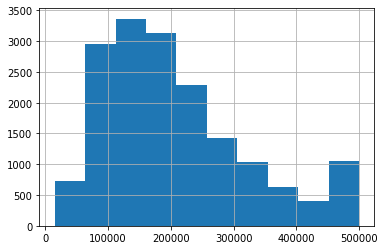

In [23]:
df_ca_housing['median_house_value'].hist()

# Exercise 1

Using the admissions table in MIMIC-III, what are the top 5 types of diagnosis at admission?

## Suggest Solution

In [24]:
df['DIAGNOSIS'].value_counts()

NEWBORN                       7823
PNEUMONIA                     1566
SEPSIS                        1184
CONGESTIVE HEART FAILURE       928
CORONARY ARTERY DISEASE        840
                              ... 
BREAST CANCER;PNEUMOTHORAX       1
EXPLORATORY LAPAROTOMY           1
AORTIC TEAR                      1
TIB/FIB FRX                      1
CHYLOTHORAX                      1
Name: DIAGNOSIS, Length: 15691, dtype: int64

New born, pneumonis, sepsis, congestive heart failure, and coronary artery disease. 

Note: The output is truncated if it's too long. If you want to see more from the list, you can use slicing to do so. See the materials from Week 3 for details. 

In [25]:
df['DIAGNOSIS'].value_counts()[:10]

NEWBORN                                                      7823
PNEUMONIA                                                    1566
SEPSIS                                                       1184
CONGESTIVE HEART FAILURE                                      928
CORONARY ARTERY DISEASE                                       840
CHEST PAIN                                                    778
INTRACRANIAL HEMORRHAGE                                       713
ALTERED MENTAL STATUS                                         712
GASTROINTESTINAL BLEED                                        686
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA     583
Name: DIAGNOSIS, dtype: int64

# Exercise 2

Using the admissions table in MIMIC-III, what are the unique values and respective occurrences in the column `HOSPITAL_EXPIRE_FLAG`?

What is the rate of in-hospital death across all hospitalisations? (Hint: Check out the meaning of the variable from [MIMIC's documentation](https://mimic.physionet.org/about/mimic/).)

## Suggested Solution

In [26]:
df['HOSPITAL_EXPIRE_FLAG'].unique()

array([0, 1])

In [27]:
df['HOSPITAL_EXPIRE_FLAG'].value_counts()

0    53122
1     5854
Name: HOSPITAL_EXPIRE_FLAG, dtype: int64

The in-hospital death rate is

In [28]:
5854 / 53122

0.11019916418809533

# Exercise 3

In the California housing dataset, what is the maximum housing median age across all areas?

Plot a histogram of housing median age across all areas.

## Suggested Solution

In [29]:
df_ca_housing['housing_median_age'].describe()

count    17000.000000
mean        28.589353
std         12.586937
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [30]:
# alternatively,
df_ca_housing['housing_median_age'].max()

52.0

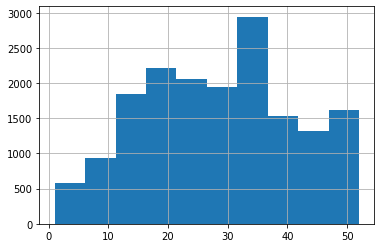

In [31]:
df_ca_housing['housing_median_age'].hist()

# Slicing and Filtering

You can filter a DataFrame by first creating a Series of boolean values, e.g.

In [32]:
df_ca_housing['housing_median_age'] > 40

0        False
1        False
2        False
3        False
4        False
         ...  
16995     True
16996    False
16997    False
16998    False
16999     True
Name: housing_median_age, Length: 17000, dtype: bool

then apply the boolean Series to the DataFrame by using another square bracket. Here, we also assign the filtered dataset to the variable `df_ca_housing_over40`.

In [34]:
df_ca_housing_over40 = df_ca_housing[df_ca_housing['housing_median_age'] > 40]

Let's view the resulting DataFrame. Here, we use a square bracket on `df_ca_housing_over40` and specify a list of columns we want to see such that we filter the DataFrame by columns. 

In [35]:
df_ca_housing_over40[['longitude', 'latitude', 'housing_median_age', 'median_house_value']]

,longitude,latitude,housing_median_age,median_house_value
7,-114.59,34.83,41.0,48500.0
9,-114.60,34.83,46.0,48100.0
12,-114.61,34.84,48.0,48600.0
67,-115.54,32.97,41.0,70800.0
82,-115.56,32.78,46.0,70800.0
...,...,...,...,...
16972,-124.17,40.79,43.0,70500.0
16992,-124.23,40.81,52.0,50800.0
16993,-124.23,40.54,52.0,106700.0
16995,-124.26,40.58,52.0,111400.0


# References

* [Getting Started with BigQuery](https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=OHCBQv4uTCPc)
* [Intro to pandas in Colab](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb#scrollTo=rHLcriKWLRe4)